In [ ]:
params_grid = {'input_size': [20],
              'hidden_units':[100],
              'dropout': [True],
              'learning_rate':[4e-5],
              'n_ahead':[12],
              'val_split': [0.2],
              'epochs':[20],
              'verbose':[False],
              'plot':[False]}

params = {'input_size': 20,
          'hidden_units':100,
          'dropout': True,
          'learning_rate':4e-5,
          'n_ahead':12,
          'val_split': 0.2,
          'epochs':20,
          'verbose':False,
          'plot':False}

import numpy as np, pandas as pd, matplotlib.pyplot as plt, keras, itertools
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# authorize drive to pull model
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Note all of this is linked to personal gmail account - because bigquery is there.
import os
os.chdir('/content/drive/MyDrive/Capstone_project')

import pandas as pd
Dataset = pd.read_csv('Test_Weekly_Activity_Score_RF.csv')

repo_data=Dataset.loc[Dataset['repoID']==113564765]
single_repo_series=repo_data.Normalised_Activity_Score
Risk_Score=single_repo_series

In [ ]:
repo_list=list(Dataset['repoID'].unique())

rows=[]
for i in range(0, len(repo_list)):
  repo_data=Dataset.loc[Dataset['repoID']==repo_list[i]]
  if repo_data.shape[0]>20:
    rows.append((repo_list[i]))

remove_list=[156630873, 168234055, 163867485, 173968989, 169825932, 165114031, 121291048, 178027217, 194736160, 181737603, 194727787, 149379192, 194736246, 159751068, 193533462, 53032138, 169601732, 173919375, 170547737, 178105940, 196555066, 141831152, 172554606, 157298123, 159539290, 185833148,164036674, 164198539, 159058750, 183677088, 145325821]
res = [i for i in rows if i not in remove_list]
rows=res

In [ ]:
print(rows)

[108110, 17165658, 2446718, 99919302, 206417, 45721011, 31006158, 39464018, 462292, 118030974, 21193524, 164026325, 151294653, 102083576, 108125, 832680, 81355383, 132600378, 206412, 32199982, 32848140, 19244865, 70746484, 93486496, 108050, 143965255, 4719160, 9735077, 37115105, 108051, 699689, 7437073, 206422, 309009, 23876346, 206402, 149178674, 143887688, 10223615, 71975377, 11151771, 153295119, 52028643, 19514152, 87100707, 41952293, 81920458, 33294317, 27557391, 45165994, 58072252, 58073483, 87100729, 206370, 143950, 63044524, 113041753, 35964690, 158448038, 16021499, 93444591, 131209056, 45896813, 9390430, 52027975, 131394823, 137439053, 116109319, 15741777, 146502453, 135523369, 83877385, 7567432, 3658431, 17443202, 136240779, 107435578, 100294206, 10860602, 75708591, 20675635, 15881868, 33679984, 93211371, 154606109, 131209340, 82691991, 74950506, 183648903, 32376872, 206478, 105323132, 61863697, 126176628, 38525117, 82371321, 149782046, 133959957, 64581179, 46900076, 33397227,

In [ ]:
model_, logs, best_predictions, y_test = GridSearch(Risk_Score,params_grid)

Fitting 1/1 model
Epoch 1/20
50/50 [==============================] - 3s 23ms/step - loss: 0.0559 - val_loss: 0.0444
Epoch 2/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0467 - val_loss: 0.0370
Epoch 3/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.0331
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0325 - val_loss: 0.0323
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0267 - val_loss: 0.0330
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0347 - val_loss: 0.0334
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0374 - val_loss: 0.0334
Epoch 8/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0348 - val_loss: 0.0338
Epoch 9/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 0.0344
Epoch 10/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0321 - val_loss: 0.0346


Epoch 1/20
196/196 [==============================] - 3s 8ms/step - loss: 0.0353 - val_loss: 0.0238
Epoch 2/20
196/196 [==============================] - 1s 6ms/step - loss: 0.0331 - val_loss: 0.0236
Epoch 3/20
196/196 [==============================] - 1s 7ms/step - loss: 0.0337 - val_loss: 0.0234
Epoch 4/20
196/196 [==============================] - 1s 7ms/step - loss: 0.0325 - val_loss: 0.0235
Epoch 5/20
196/196 [==============================] - 1s 6ms/step - loss: 0.0336 - val_loss: 0.0234
Epoch 6/20
196/196 [==============================] - 1s 6ms/step - loss: 0.0342 - val_loss: 0.0233
Epoch 7/20
196/196 [==============================] - 1s 7ms/step - loss: 0.0341 - val_loss: 0.0233
Epoch 8/20
196/196 [==============================] - 1s 7ms/step - loss: 0.0334 - val_loss: 0.0234
Epoch 9/20
196/196 [==============================] - 1s 7ms/step - loss: 0.0330 - val_loss: 0.0234
Epoch 10/20
196/196 [==============================] - 1s 7ms/step - loss: 0.0333 - val_loss: 0.0234

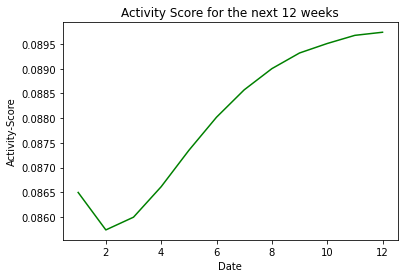

In [ ]:
repo_data=Dataset.loc[Dataset['repoID']==11362691]
single_repo_series=repo_data.Normalised_Activity_Score
Risk_Score=single_repo_series

new_model_, mse, history, predictions, y_test = Test_FitEvaluate(Risk_Score, params, model_)

#plotting predictions for next 12 weeks

#Final_Score=inverse_transform(best_predictions, scaler)
Final_Score=predictions.reshape(12)
Final_Score[Final_Score<0] = 0

# data to be plotted 
x = np.arange(start=1, stop=13, step=1)

#print(i)
#print(rows[i])
fig = plt.figure()
fig.patch.set_facecolor('white') 
plt.title("Activity Score for the next 12 weeks")  
plt.xlabel("Date")  
plt.ylabel("Activity-Score")
plt.plot(x, Final_Score, color ="green")  
plt.show()

In [ ]:
Final_Score

array([0.08817505, 0.08746488, 0.08774897, 0.08823892, 0.08895537,
       0.08961844, 0.09016524, 0.09059069, 0.09090973, 0.09090021,
       0.09106717, 0.0909531 ])

In [ ]:
new_model_.save('Spring_2021_Model3.h5')

In [ ]:
repo_data=Dataset.loc[Dataset['repoID']==11362691]
single_repo_series=repo_data.Normalised_Activity_Score
Risk_Score=single_repo_series
X = Risk_Score[-20:].values
series = np.array(X)
#print(series.shape)
series=np.reshape(series,(1,series.shape[0],1))
#print(series.shape)
n_ahead = 12

In [ ]:
predictions = np.zeros(12)
predictions[0] = new_model_.predict(series,batch_size = 1)
    
if n_ahead > 1:
    for i in range(1,n_ahead):
        x_new = np.append(series[0][1:],predictions[i-1])
        series = x_new.reshape(1,x_new.shape[0],1)
        predictions[i] = new_model_.predict(series,batch_size = 1)

In [ ]:
predictions

array([0.09102078, 0.0938859 , 0.09462053, 0.09429513, 0.09357248,
       0.09274627, 0.09203491, 0.09145586, 0.09101695, 0.09070092,
       0.09048326, 0.09033927])

In [ ]:
pip install dash

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 1.0MB 6.7MB/s 
     |████████████████████████████████| 3.5MB 12.5MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 1.8MB 40.2MB/s 
     |████████████████████████████████| 358kB 37.3MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=ae001b7b03951813405b98dddc8674407b064cbc7be708ee83c30e670b79d0b8
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=00953f2911bcf2086747df5cb32e6b22bfca73f99ad899d1f747a3c3f142939c
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=7f6291b8f2369905ba3c195

In [ ]:
import dash
#import dash_core_components as dcc
#import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import numpy as np, pandas as pd, matplotlib.pyplot as plt, keras, itertools
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
df = Dataset[["repoID", "Normalised_Activity_Score"]]

In [ ]:
df

,repoID,Normalised_Activity_Score
0,108110,0.056643
1,108110,0.027175
2,108110,0.039558
3,108110,0.050366
4,108110,0.045777
...,...,...
46208,145325821,0.000000
46209,145325821,0.000000
46210,145325821,0.000000
46211,145325821,0.155886


In [ ]:
repo_data=df[df['repoID']==11362691]

In [ ]:
Final_Score=predictions.reshape(12)
Final_Score[Final_Score<0] = 0

        # data to be plotted 
x = np.arange(start=1, stop=13, step=1)

        #print(i)
        #print(rows[i])
fig = plt.figure()
fig.patch.set_facecolor('white') 
plt.title("Activity Score for the next 12 weeks")  
plt.xlabel("Date")  
plt.ylabel("Activity-Score")
plt.plot(x, Final_Score, color ="green")

first = go.scatter(x, Final_Score)
data = [first]

fig = {'data': data,
              'layout': {
                  'title': str(symbol) + " Health Forecast",
                  'plot_bgcolor': colors['background'],
                  'paper_bgcolor': colors['background'],
                  'font': {
                      'color': colors['text'],
                      'size': 18
                  }}
              }
fig

TypeError: ignored

In [ ]:
predict_1 = new_model_.predict(X)

In [ ]:
def GridSearch(series, params_grid):
    """
    Runs a grid search over specified parameter ranges
    Args:
        series: the time series of interest
        params_grid: a dictionary specifying parameters
                    {input_size, hidden_units, dropout,
                    learning_rate, n_ahead, val_split,
                    epochs, verbose, plot} and their
                    possible value ranges
    Returns:
        model: the model with the lowest MSE
        logs: logs of all combinations

    """
    param_names = list(params_grid.keys())
    param_values = list(params_grid.values()) 
    combinations = list(itertools.product(*param_values))
    
    logs = pd.DataFrame(combinations,columns=param_names)
    
    mse_prev = 50
    for index, comb in enumerate(combinations):
        print('Fitting {}/{} model'.format(index+1,len(combinations)))
        params = dict(zip(param_names,comb))
        model, mse, history, predn, y_test = FitEvaluate(series,params) #Fit eval
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
                
        if mse < mse_prev:
            mse_prev = mse
            best_model = model              #best Model
            best_predictions = predn
            yt = y_test
        
        logs.at[index,'mse'] = mse
        logs.at[index,'mean_training_loss'] = np.mean(train_loss)
        logs.at[index,'std_training_loss'] = np.std(train_loss)
        logs.at[index,'mean_val_loss'] = np.mean(val_loss)
        logs.at[index,'std_val_loss'] = np.std(val_loss)
    logs.to_csv('results.csv',index=False)
    # view_predictions(series,best_predictions,y_test,'Actual vs Forecast')
    return best_model, logs, best_predictions, yt

def FitEvaluate(time_series, params):
    """
    Calls the pipeline to fit an LSTM model to the
    given time series

    Args:
        time_series: the time series of interest
        params: a dictionary specifying parameters
                {input_size, hidden_units, dropout,
                learning_rate, n_ahead, val_split,
                epochs, verbose, plot}
    Returns:
        model: keras sequential model
        mse: mean squared error of the prediction
        history: training and validation loss history

    """
    for k in params.keys():
        globals()[k] = params[k]
        
    scaled_series, scaler = preprocessing(time_series) 
    series, y_test, n_test = getSeries(scaled_series,0.8)
    X_train,y_train,X_test = getInputOutput(series,input_size)
    
    # show only n_ahead number of actual values
    y_test = y_test[np.arange(n_ahead)]

    new_model, predictions, history = FitForecast(X_train,y_train,X_test,n_ahead,
                                        input_size,hidden_units,dropout, val_split,
                                        learning_rate,epochs,trained_model=None)
    
    # rescaling
    series = inverse_transform(series, scaler)
    y_test = inverse_transform(y_test, scaler)
    predictions = inverse_transform(predictions, scaler)

    mse = mean_squared_error(y_true=y_test,y_pred=predictions)
    
    #if verbose:
     # print('\n')
      #print('======== Prediction Evaluation =========')
      #print('MSE is {}'.format(mse))
        
    #if plot:
     # ViewLoss(history)
      #view_predictions(series,predictions,y_test,'Actual vs Forecast')
    return new_model, mse, history, predictions, y_test


def preprocessing(series):
    """
    MinMax Scaling of the raw time series
    Args:
        series: the raw time series
    Returns:
        scaled_series and scaler object
    """
    series = np.array(series)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(series.reshape(-1, 1))
    scaled_series = scaled.reshape((len(series),))
    return (
     scaled_series, scaler)


def getSeries(data, p):
    """
    Splits a given time series proportionally
    for training and testing purposes

    Args:
        data: numpy array or pandas series
              containing the time series.
        p: float value that defines the
           proportion of the series used
           for training.
    Returns:
        series: time series for training
        y_test: time series for testing
        n_test: number of timesteps
                in the test series

    """
    n = data.shape[0]
    n_train = int(n * p)
    n_test = n - n_train
    x = np.arange(n)
    index_train = x[:n_train]
    index_test = x[n_train:]
    series = data[index_train]
    y_test = data[index_test]
    return (series, y_test, n_test)



def getInputOutput(series, input_size):
    """
    Transforms the time series into desired
    shape to be able to pass to the network

    Args:
        series: the time series.
        input_size: int that defines the length
                    of the input sequence to be
                    fed to the network
    Returns:
        X_train: input dataset
        y_train: output values
        X_test: the last available sequence

    """
    series = np.array(series)
    xlen = len(series)
    xrows = xlen - input_size
    X_train, y_train = [], []
    for i in range(xrows):
        j = i + input_size
        a = series[i:j, np.newaxis]
        X_train.append(a)
        y_train.append(series[j])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test = series[xrows:].reshape(1, input_size, 1)
    return (
     X_train, y_train, X_test)
    


def FitForecast(X_train, y_train, X_test, n_ahead, input_size, hidden_units, dropout, val_split, learning_rate, epochs, trained_model):
    """
    Fits a model and returns the predicted values.
    Optionally weights from another network can be passed

    Args:
        X_train: input dataset for training
        y_train: output dataset for training
        X_test: the last available sequence
        n_ahead: number of predictions to make
        time_series: the time series of interest
        input_size: int that defines the length
                    of the input sequence to be
                    fed to the network
        hidden_units: int/list specifying the number
                      of hidden units in the hidden
                      layer/layers
        dropout: boolean specifing whether to add dropout
                 with 0.5 rate per layer
        learning_rate: learning rate of the Adam
                       optimization algorithm
        epochs: int that defines the number of
                training phases through the
                training dataset
        trained_model: already trained keras sequential
                       model

    Returns:
        model: keras sequential model
        predictions: numpy array containing the predicted values
        history: training and validation loss history

    """
    model = build_LSTM(input_size,hidden_units,dropout, learning_rate)
    
    if trained_model is not None:
        model.set_weights(weights = trained_model.get_weights())        
    
    
    history = model.fit(x=X_train, y=y_train, 
                batch_size=1, epochs=epochs, 
                verbose=1, validation_split=val_split,
                shuffle=False)

    predictions = predict_ahead(model,X_test,n_ahead)
    return model, predictions, history



def build_LSTM(input_size, hidden_units, dropout, learning_rate):
    """
    Builds the Network with LSTM hidden layers

    Args:
        input_size: int that defines the length
                    of the input sequence to be
                    fed to the network
        hidden_units: int/list specifying the number
                      of hidden units in the hidden
                      layer/layers
        dropout: boolean specifing whether to add dropout
                 with 0.5 rate per layer
        learning_rate: learning rate of the Adam
                       optimization algorithm
    Returns:
        model: keras sequential model

    """
    h = hidden_units
    

    model = Sequential()
    
    if isinstance(h,list):
    
        model.add(LSTM(h[0],
                   batch_input_shape=(1,input_size, 1), 
                   return_sequences=True, 
                   stateful=True))
                  
        if dropout:
            model.add(Dropout(rate=0.5))

        if len(h) > 2:
            #removing 1st and last units
            for index, units in enumerate(h[1:-1]):  
                model.add(LSTM(units, 
                               batch_input_shape=(1,h[index], 1), 
                               return_sequences=True, 
                               stateful=True)) 
                if dropout:
                    model.add(Dropout(rate=0.5))

        model.add(LSTM(h[-1], 
                       batch_input_shape=(1,h[-2], 1), 
                       return_sequences=False, 
                       stateful=True))
        if dropout:
            model.add(Dropout(rate=0.5))
    else:
        model.add(LSTM(h, 
                   batch_input_shape=(1,input_size, 1),
                   return_sequences=False, 
                   stateful=True)) 
        if dropout:
            model.add(Dropout(rate=0.5))
        
    
    model.add(Dense(1))
    adam = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=adam)
    return model



def predict_ahead(model, X_test, n_ahead):
    """
    Makes predictions based on the last available sequence

    Args:
        model: keras sequential model
        X_test: the last available sequence
        n_ahead: number of predictions to make

    Returns:
        predictions: numpy array containing the predicted values

    """
    predictions = np.zeros(n_ahead)
    predictions[0] = model.predict(X_test,batch_size = 1)
    print(X_test.shape)
    if n_ahead > 1:
        for i in range(1,n_ahead):
            x_new = np.append(X_test[0][1:],predictions[i-1])
            X_test = x_new.reshape(1,x_new.shape[0],1)
            predictions[i] = model.predict(X_test,batch_size = 1)
    return predictions



def inverse_transform(series, scaler):
    """
    Inverse transform of scales series
    Args:
        series: scaled series
        scaler: scaler object
    Returns:
        unscaled series
    """
    return scaler.inverse_transform(series.reshape(-1, 1))



def ViewLoss(history):
    '''
    Plots the history of model training
    '''
    plt.plot(history.history['loss'],label='Train')
    plt.plot(history.history['val_loss'],label='Val')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.savefig('loss-history.png')
    plt.show()


def view_predictions(series,predictions,actual,title):
    '''
    Plots the results of the predictions made by the model
    
    Args:
        series: the time series used for training the network
        predictions: numpy array containing the predicted values
        actual: the actual time series not seen by the network
        title: the title of the plot
        
    Returns:
        plot        
        
    '''  
    
    plt.figure(figsize=(8,4))
    plt.title(title)
    
    if isinstance(series,list):
        train_index = np.arange(len(series[0]))
        test_index = len(series[0]) + np.arange(len(actual))
        
        plt.plot(train_index,series[0], label = 'general')
        
    else:
        train_index = np.arange(len(series))
        test_index = len(series) + np.arange(len(actual))        
        plt.plot(train_index,series,label = 'training')

    if len(predictions) > 4:
        plt.plot(test_index,predictions,label = 'prediction',color='g')
        plt.plot(test_index,actual,label = 'actual',color='orange')
    else:
        plt.scatter(test_index,predictions,label = 'prediction',color='g')
        plt.scatter(test_index,actual,label = 'actual',color='orange')    
    
    plt.xlabel('Index')
    plt.ylabel('Data')
    
    plt.legend(loc='upper left')
    plt.savefig('{}_{}.png'.format(title,len(series)))
    plt.show()



def Test_FitEvaluate(time_series,params,model_):
    '''
    Calls the pipeline to fit an LSTM model to the 
    given time series
    
    Args:
        time_series: the time series of interest
        params: a dictionary specifying parameters
                {input_size, hidden_units, dropout,
                learning_rate, n_ahead, val_split, 
                epochs, verbose, plot}
    Returns:
        model: keras sequential model      
        mse: mean squared error of the prediction
        history: training and validation loss history
        
    '''   
    
    for k in params.keys():
        globals()[k] = params[k]
    
    
    scaled_series, scaler = preprocessing(time_series)
    series, y_test, n_test = getSeries(scaled_series,0.8)
    X_train,y_train,X_test = getInputOutput(series,input_size)
    
    # show only n_ahead number of actual values
    y_test = y_test[np.arange(n_ahead)]

    new_model, predictions, history = FitForecast(X_train,y_train,X_test,n_ahead,
                                        input_size,hidden_units,dropout, val_split,
                                        learning_rate,epochs,trained_model=model_)
    # rescaling
    series = inverse_transform(series, scaler)
    y_test = inverse_transform(y_test, scaler)
    predictions = inverse_transform(predictions, scaler)
    
    mse = mean_squared_error(y_true=y_test,y_pred=predictions)
    
    #print('MSE is {}'.format(mse))
     
    #ViewLoss(history)
    #view_predictions(series,predictions,y_test,'Actual vs Forecast')
    return new_model, mse, history, predictions, y_test

In [ ]:
def update_graph(value):
    #Dataset = pd.read_csv("Test_Weekly_Activity_Score_R_local.csv")
    #model=load_model("Spring_2021_Model3.h5")
    #print(value)
    repo_data=df[df['repoID']==value]
    single_repo_series=repo_data.Normalised_Activity_Score
    Risk_Score=single_repo_series[-20:].values
    series = np.array(Risk_Score)
    series=np.reshape(series,(1,series.shape[0],1))

    predictions = np.zeros(12)
    predictions[0] = new_model_.predict(series,batch_size = 1)
    n_ahead = 12
    if n_ahead > 1:
        for i in range(1,n_ahead):
            x_new = np.append(series[0][1:],predictions[i-1])
            series = x_new.reshape(1,x_new.shape[0],1)
            predictions[i] = new_model_.predict(series,batch_size = 1)
            
    Final_Score=predictions.reshape(12)
    Final_Score[Final_Score<0] = 0

        # data to be plotted 
    x = np.arange(start=1, stop=13, step=1)
    #first = go.line(x, Final_Score)
    #data = [first]
        #print(i)
        #print(rows[i])
    fig = plt.figure()
    fig.patch.set_facecolor('white') 
    plt.title("Activity Score for the next 12 weeks")  
    plt.xlabel("Date")  
    plt.ylabel("Activity-Score")
    plt.plot(x, Final_Score, color ="green")  
    return fig

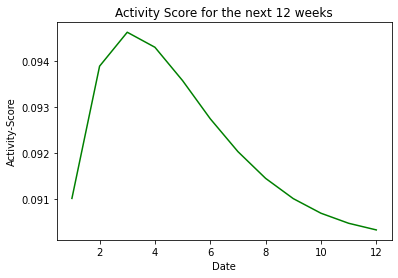

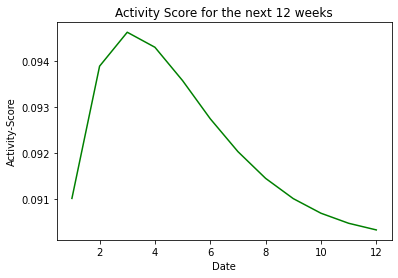

In [ ]:
update_graph(11362691)